# Implement Logistic Regression from Scratch

- [book](http://math.ecnu.edu.cn/~lfzhou/seminar/[Joel_Grus]_Data_Science_from_Scratch_First_Princ.pdf) 
- [resource](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)
- [logistic regression cost fnction derivative](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)
- [source code](https://github.com/bfortuner/ml-glossary/tree/master/code)

In [1]:
import numpy as np

In [2]:
def sigmoid(x: np.array):
    return 1/(1+np.exp(-x))

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

## Logistic function property

As its 
- input gets **large and positive**, it gets closer and closer to `1`. 
- As its input gets **large and negative**, it gets closer and closer to `0`.

In [3]:
sigmoid(np.array([-10])), sigmoid(np.array([0])), sigmoid(np.array([10]))

(array([4.53978687e-05]), array([0.5]), array([0.9999546]))

## Logistic function derivative

![image](https://www.researchgate.net/profile/Farid_Najafi/publication/268874045/figure/fig2/AS:295410393468928@1447442734016/Graph-of-the-dynamic-logistic-function-and-its-derivative-function-for-active-input-range.png)

In [4]:
def sigmoid_prime(x: np.array):
    return sigmoid(x)*(1-sigmoid(x))

In [5]:
sigmoid(np.array([-10,-10])), sigmoid(np.array([0,0])), sigmoid(np.array([10,10]))

(array([4.53978687e-05, 4.53978687e-05]),
 array([0.5, 0.5]),
 array([0.9999546, 0.9999546]))

In [6]:
sigmoid_prime(np.array([-10,-10])), sigmoid_prime(np.array([0,0])), sigmoid_prime(np.array([10,10]))

(array([4.53958077e-05, 4.53958077e-05]),
 array([0.25, 0.25]),
 array([4.53958077e-05, 4.53958077e-05]))

# Loss Function (Cost function)

we use a cost function called **Cross-Entropy**, also known as `Log Loss`. Cross-entropy loss can be divided into two separate cost functions: 
- one for $𝑦=1$
- one for $𝑦=0$

![image](https://ml-cheatsheet.readthedocs.io/en/latest/_images/ng_cost_function_logistic.png)

**Above functions compressed into one**

![image](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_cost_function_joined.png)

**Vectorized cost function**

![image](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_cost_function_vectorized.png)

- [source](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)

```py
h = prediction = sigmoid(x@w.T)

x <- dimension 4,3
y <- dimension 4,1
w <- dimension 1,3

h = sigmoid(x@w.T) <- dimesion 4,1
log(h) <- dimension (4,1)
```

$y^T*\log(h)$ <- dimension 1,1

In [7]:
def predict(X: np.array, w: np.array):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    return sigmoid(X@w)

In [8]:
def loss_fn(y_hat: np.array, y: np.array):
    '''
    cost function = NEGATIVE LOG LIKELIHOOD
    Using Mean Absolute Error

    y: Labels: (100,1)
    y_hat: predicted (100, 1)
    m <- len(y)
    Cost = (y*log(y_hat) + (1-y)*log(1-y_hat) ) / m
    
    Returns 1D matrix of predictions
    '''
    m = len(y)

    #Take the error when label=1
    class1_cost = y*np.log(y_hat)

    #Take the error when label=0
    class2_cost = (1-y)*np.log(1-y_hat)

    #Take the sum of both costs
    cost = (-1)*(class1_cost + class2_cost)

    #Take the average cost
    cost = cost.sum() / m

    return cost

In [9]:
X = np.random.rand(4,3)
y = np.array([1,0,0,1]).reshape(-1, 1)
w = np.random.rand(3,1)

In [10]:
y_hat = predict(X, w)
loss_fn(y_hat, y)

0.831301744339975

<center>
    <img src="https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg" width="600">
</center>

## Loss function derivative

![image](https://miro.medium.com/max/289/1*Nr2E9HL-RCDIW78VmBiJyg.png)

```
y_hat - y <- dimension 4,1  # assuming 4 records
X <- feature <- dimension 4,3 # assuming 4 records and each record has 3 feature
```

X.T(y_hat - y) <- dimension 3, 1 # for 3 feature, 3 weight $w_1, \dots, w_3$ ($\theta_1, \dots, \theta_3$) and 3 partial derivatives $\frac{\partial L}{\partial w_1}$, $\frac{\partial L}{\partial w_2}$, $\frac{\partial L}{\partial w_3}$ , but all values put inside a numpy vector

In [11]:
def loss_fn_grad(X, y, w):
    """Calculate gradient of the loss function
    """
    m = len(y)
    y_hat = predict(X,w)
    grad = (X.T @ (y_hat - y))/m
    return grad

In [12]:
loss_fn_grad(X, y, w)

array([[0.13559734],
       [0.10684298],
       [0.11539397]])

# Gradient descent

```py
Repeat {

  1. Calculate gradient average
  2. Multiply by learning rate
  3. Subtract from weights

}
```

In [68]:
def update_weight(X, y, w, lr=0.01):
    w -= lr*loss_fn_grad(X, y, w)
    return w

In [14]:
def decision_boundary(prob: float):
    return 1 if prob >= 0.5 else 0

In [63]:
def train(X, y, w, lr=0.01, epochs=5):
    
    """
    Gradient decent algorithm, where at each epoch all the datasets are passed
    It can be improved by using Stochastic gradient discent 
    """
    
    loss_history = []

    for i in range(epochs):
        
        y_hat = predict(X, w)
        loss = loss_fn(y_hat, y)
        loss_history.append(loss)
        
        # update weight
        w = update_weight(X, y, w, lr)

        # Log Progress
        if i % 1000 == 0:
            print("epoch: "+str(i) + " \t loss: "+str(np.round(loss,4)))

    return w, loss_history

In [64]:
np.random.choice([0,1], size=(4,1), p=[0.5,0.5])

array([[1],
       [0],
       [0],
       [1]])

# Create fake dataset

In [65]:
nr = 8000
nf = 10
X = np.random.rand(nr,nf)
y = np.random.choice([0,1], size=(nr,1), p=[0.4, 0.6])
w = np.random.rand(nf,1)

In [66]:
X.shape, y.shape, w.shape

((8000, 10), (8000, 1), (10, 1))

# Train model

In [67]:
w_hat, loss_history = train(X, y, w, lr = 0.001, epochs=20000)

epoch: 0 	 loss: 1.216
epoch: 1000 	 loss: 0.9646
epoch: 2000 	 loss: 0.8038
epoch: 3000 	 loss: 0.7241
epoch: 4000 	 loss: 0.6923
epoch: 5000 	 loss: 0.6811
epoch: 6000 	 loss: 0.6774
epoch: 7000 	 loss: 0.6761
epoch: 8000 	 loss: 0.6756
epoch: 9000 	 loss: 0.6753
epoch: 10000 	 loss: 0.6751
epoch: 11000 	 loss: 0.6749
epoch: 12000 	 loss: 0.6747
epoch: 13000 	 loss: 0.6745
epoch: 14000 	 loss: 0.6744
epoch: 15000 	 loss: 0.6742
epoch: 16000 	 loss: 0.6741
epoch: 17000 	 loss: 0.6739
epoch: 18000 	 loss: 0.6738
epoch: 19000 	 loss: 0.6737


# Plot loss

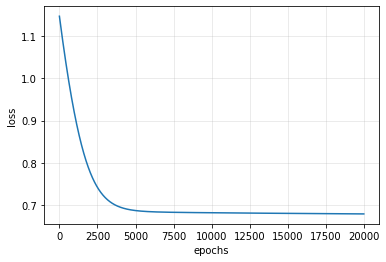

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid(alpha=0.3)
plt.show()